# EO-Forge examples

### Download and Load Sentinel2 Data.

The function used to download the data uses the Google Storage API (instead of `gsutil`). 
You need to configure the new credential for this API to work:

https://cloud.google.com/docs/authentication/getting-started#cloud-console

Once you followed those steps, create a symbolic link to your json file containing google-cloud credentials that points to the same folder where this notebook is located and it is named `gcloud.json`:

`ln -s path/to/your/gcloud/your_file.json gcloud.json`

### Dependencies

conda install -c conda-forge google-cloud-storage 

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import sys
import numpy as np
sys.path.append('..')
from eo_forge.io import Sentinel2Loader
from sentinelhub import BBox, DataCollection, CRS
from matplotlib import pyplot as plt

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'gcloud.json'

/home/aperez/.conda/envs/bta/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
def plot_patch(in_eopatch):    
    plt.figure(figsize=(10,10))
    band_data = in_eopatch.data['BANDS'].squeeze()[...,(2,1,0)].swapaxes(2,0).swapaxes(2,1)
    plt.imshow(np.clip(3.5 * in_eopatch.data['BANDS'].squeeze()[...,[2,1,0]],0,1))
    plt.title("RGB Image")
    plt.xticks([])
    plt.yticks([]) 

## Read and plot the entire patch

In [4]:
%%time
# Only load the bands needed for the cloud detection to save RAM
# BANDS=("B01","B02","B03","B04","B05","B08","B8A","B09","B10","B11","B12")
BANDS=("B01","B02", "B03")
# Work at coarse resolution
RESOLUTION=60

## Define the EOTasks
load_data = Sentinel2Loader(
    folder="./data/sentinel/sentinel2_raw/", 
    resolution=RESOLUTION,
    bands=BANDS,    
)

# You can use the full path to the SAFE folde instead of the tile_id.
prod_id ="./data/sentinel/sentinel2_raw/tiles/20/J/LQ/S2A_MSIL1C_20151001T142056_N0204_R010_T20JLQ_20151001T143019.SAFE/"
# eopatch=load_data.execute(product_id="S2A_MSIL1C_20151001T142056_N0204_R010_T20JLQ_20151001T143019.SAFE")
eopatch_full=load_data.execute(product_id=prod_id, download="auto")
eopatch_full

CPU times: user 2.56 s, sys: 225 ms, total: 2.78 s
Wall time: 1.21 s


EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(1, 1830, 1830, 3), dtype=float32)
  }
  mask: {
    IS_VALID: numpy.ndarray(shape=(1, 1830, 1830, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    BANDS: ['B01', 'B02', 'B03']
  }
  bbox: BBox(((300000.0, 6890200.0), (409800.0, 7000000.0)), crs=CRS('32720'))
  timestamp: [datetime.datetime(2015, 10, 1, 14, 20, 56)]
)


The bounding box for this tile (in projected coordinates) is: BBox(((300000.0, 6890200.0), (409800.0, 7000000.0)), crs=CRS('32720'))

Let's select a small region inside a bounding box that is contained by the tile.

## Load a selected region from the patch

In [5]:
%%time
## Define the EOTasks
# bbox=BBox([-72.03573832085232,-28.098611044457343,-60.91007663635522,-27.119521225977053],4326)
#BBox(((300000.0, 6890200.0), (409800.0, 7000000.0)), crs=CRS('32720'))
bbox=BBox(((300000.0, 6890200.0), (350000.0, 6950000.0)), crs=CRS('32720'))
load_data = Sentinel2Loader(
    folder="./data/sentinel/sentinel2_raw/", 
    resolution=RESOLUTION,
    bands=BANDS,
    bbox=bbox
)

eopatch_bbox=load_data.execute(product_id="S2A_MSIL1C_20151001T142056_N0204_R010_T20JLQ_20151001T143019.SAFE",
                           crop=True,
                           nodata=0,
                           hard_bbox=False)
eopatch_bbox

CPU times: user 9.72 s, sys: 328 ms, total: 10 s
Wall time: 2.88 s


EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(1, 997, 834, 3), dtype=float32)
  }
  mask: {
    IS_VALID: numpy.ndarray(shape=(1, 997, 834, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    BANDS: ['B01', 'B02', 'B03']
  }
  bbox: BBox(((300000.0, 6890230.0), (350040.0, 6950050.0)), crs=CRS('32720'))
  timestamp: [datetime.datetime(2015, 10, 1, 14, 20, 56)]
)

Now let's select a small region inside a bounding box that it is not fully contained by the tile. That is, some parts of the bbox lie outside the tile.

In [6]:
eopatch_bbox2=load_data.execute(product_id="S2A_MSIL1C_20151001T142056_N0204_R010_T20JLQ_20151001T143019.SAFE",
                           crop=True,
                           nodata=0,
                           bbox=BBox(((290000.0, 6890200.0), (350000.0, 6950000.0)), crs=CRS('32720')),
                           hard_bbox=True)
eopatch_bbox2

EOPatch(
  data: {
    BANDS: numpy.ndarray(shape=(1, 996, 1000, 3), dtype=float32)
  }
  mask: {
    IS_VALID: numpy.ndarray(shape=(1, 996, 1000, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    BANDS: ['B01', 'B02', 'B03']
  }
  bbox: BBox(((290000.0, 6890239.999999999), (350000.0, 6949999.999999999)), crs=CRS('32720'))
  timestamp: [datetime.datetime(2015, 10, 1, 14, 20, 56)]
)

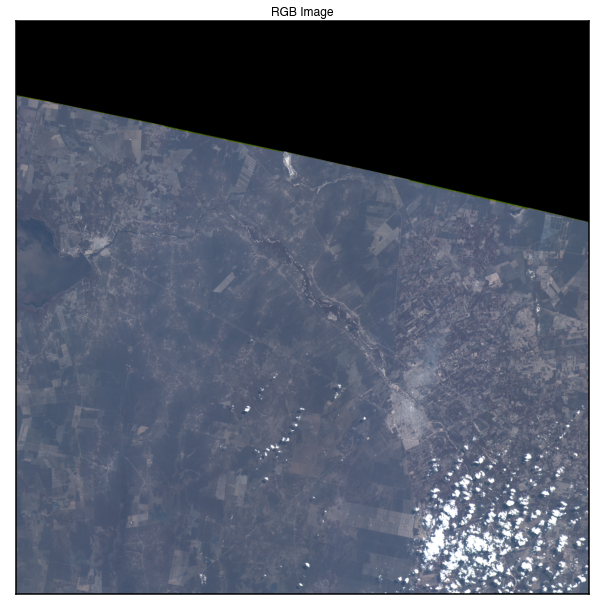

In [7]:
plot_patch(eopatch_full)

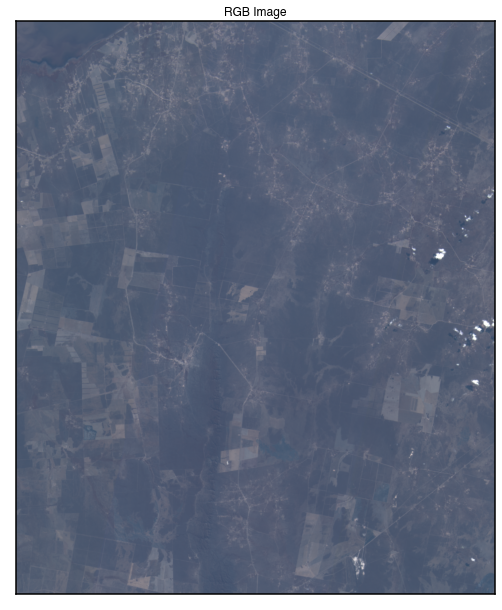

In [8]:
plot_patch(eopatch_bbox)

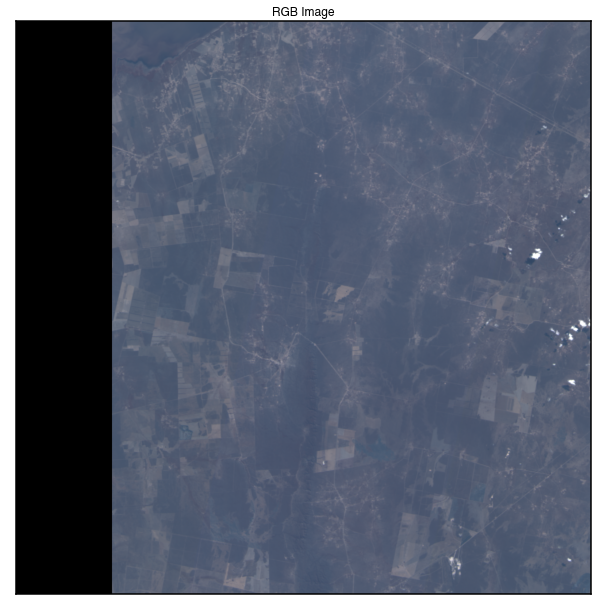

In [9]:
plot_patch(eopatch_bbox2)

Note the black margin located at the left of the plot.